# CAP 5619 AI for FinTech 
### Dr. Ramya Akula
#### Spring 2023
### Final - Group Research Project
## TEAM E


## Title: Predicting ETF values with Equity Style Timing Investing to Create a Profitable ETF

### Group ID #s :   <code>    </code>  5491479  |     <code>    </code>      4237046         	|    <code>    </code>       4672742      	|      <code>    </code>     4325499    <code>    </code>  

### Group Members Names :  Carlene Bennett   |  Carlo Manfredini  |  Carson Reeder  |  Elena Louwe Kooijmans

## 1.0 Problem Statement 


##### Hypothesis:

Leveraging advanced machine learning (ML) techniques, specifically an Autoregressive Moving Average (ARIMA) model, a Support Vector Machine (SVM), and a Long Short-Term Memory (LSTM) multilayer perceptron (MLP), to predict the performance of Exchange Traded Funds (ETFs) in conjunction with an equity style timing investment strategy that will result in an AI-managed ETF that outperforms the S&P 500.

Our study applies ML techniques to forecast the value of small cap value, small cap growth, large cap value, and large cap growth ETFs, thereby enhancing the decision-making process within WM firms.  The creation of an automated optimal investment strategy tool will benefit wealth management firms to reallocate valuable human resources to focus on the identification of new strategic opportunities in the wake of a rapidly evolving industry due to the rise of FinTech companies. 

##### Problem Statement:

The wealth management industry is in a dynamic environment that has seen a rapid increase in global competition from existing and new entrants such as FinTech startups, increased utilization of technology and changes in customer demands.  In addition, traditional financial models used by wealth management companies are not able to accurately predict the values of ETFs due to their nonlinear nature.  These methods are generally time-consuming, labor-intensive, and not scalable which translates to increased operational costs and shrinking or static client-based for wealth management firms. However, ML techniques have the potential to uncover complex relationships to reveal intricate patterns and correlations within data, allowing for more accurate financial forecasting models.  This then creates the potential for greater profits for both wealth management companies and their clients.


## 2.0 Literature

There are several literatures that have validated the usefulness of Artificial Intelligence (AI) and ML algorithms in predicting, with varying degrees of accuracy, returns on financial securities such as stocks and ETFs.
 
In 2018, Kyung-Soo Liew and Mayster explored the use of different ML techniques for predicting ETF price movements which aligns with our project as it compared the performance of different algorithms such as Random Forest, Support Vector Machines (SVM) and Deep Neural Networks (DNN) – the latter having the least advantage of the 3. This allowed us to shortlist the best options for our model.
 
Zhang and Wu (2020) explored the utilization of Long Short-Term Memory (LSTM) models for predicting stock prices. The authors trained and tested their LSTM model on historical stock price data from the S&P 500 index, using a broad array of technical indicators as input features. The results showed that the LSTM model was able to outperform traditional time series models like ARIMA in terms of accuracy and predictive power, hence we decided to include this in our model. 

Zhang et al. (2020) proposed a deep learning model based on LSTM and Rectified Linear Unit (ReLU) activation function for multivariate time series prediction. The model was tested on a real-world dataset which showcased improved performance when compared to another machine learning model like Support Vector Regression (SVR). This paper served as a reference for further development of our deep learning model based on LSTM, ReLU, and Adam optimizer for predicting index values, subsequently resulting in an optimized ETF based on the macroeconomic environment. 

Verma et al. (2022) delineated an ensemble model that combines ARIMA to predict the trend and seasonality of stock market data. Subsequently, they then utilized the residuals from the ARIMA model as an input to the LSTM model — this allowed for the capturing of the nonlinear and complex patterns; the final prediction was obtained by combining the outputs of both models. This paper enabled us to consider combining the strengths of an ARIMA and an LSTM model in an effort to develop an ensemble model.

Day and Lin (2019) developed a robo-advisor framework to predict and optimize ETF investment portfolios that was shown to produce higher return on investment and lower risk than traditional investment strategies. This provided the framework needed to improve our model.


Meyler et al (1998) provided us insights into the use of ARIMA time series models as a good method in forecasting inflation more accurately. This is relevant to our research as we also incorporated external factors that affect equity prices in our model.


## 3.0 Modeling Type and Technique 
+ Describe what kind of model is employed for this project and why. Explain how this model is implemented. 
+ Clearly mention details on, before and after midterm

### 3.1 ARIMA Modeling
Autoregressive moving average (ARIMA) models are useful for analyzing time-series data and predicting future outcomes based on historical data.  In our project, we first developed an ARIMA model to verify the validity of our dataset before exploring more complex machine learning (ML) models.  The ARIMA model enabled us to isolate each feature in the dataset, provide descriptive statistics on each feature, and model predictive results following the training process.

 #### 3.1.1 Data Cleaning
To prepare the dataset for ARIMA modeling, we cleaned it by dropping null values, transforming the ‘Date’ column to the DateTime data type, and adjusting the date frequency to business days to align with stock market hours of operation (Mon-Fri).  During the ARIMA development process, we tracked the results closely through descriptive statistics and analytical tests, especially autocorrelation plots
 
#### 3.1.2 SARIMAX
We applied the seasonal autoregressive integrated moving average with exogenous variables (SARIMAX) model to each feature of the dataset to document statistically significant data. We paid close attention to the p-value for each feature, assuming significance under a 95% confidence interval.  We assumed a (1,1,1) model order, which includes one lag of the dependent variable, one order of differencing to make the data stationary, and one lag of the error term. Although the AIC outputs of the SARIMAX models justified this order as a good fit for the data, the specific process followed to reach this order.

We plotted autocorrelation and partial autocorrelation after first order differencing.  This plot allowed us to visualize the appropriate number of lags and incorporate them into the model.  In our case, the (1,1,1) model order held up for VUG,  while a (1,1,2) order found more accuracy for VTV, VSGAX and VIVO.  These changes came directly from the plots and were verified by our SARIMAX output having less Kurtosis and Heteroskedasticity, though the changes were miniscule. 
#### 3.1.3 Residuals Analysis
Throughout ARIMA development, we tracked results closely through descriptive statistics and analytical tests, particularly using autocorrelation plots. We evaluated the mean residual after model fit, as a residual mean value closer to zero implies more linearity and less bias in the data.
 
#### 3.1.4 ARIMA Training and Forecast
We split the data into training and testing datasets using the 80-20 split method, where 80% of the data was allocated to a training dataset and 20% was allocated to a testing dataset. We trained the model with in-sample testing using a rolling window walk-through validation approach, using only data from one feature of the dataset (VUG closing prices) for this instance. We slowly trained the training set index by index and added it to a list prior to rolling over to the next index. We then applied these predictions to the test set.

We compared the predicted scores to the test set scores (historical data) and evaluated the mean square error (MSE) for the predicted scores compared to the historical data. We used the MSE as a metric to determine the performance of the model, taking outliers into account. We visualized the VUG forecast in a plot by tracing the predicted values evaluated from the model training in the previous step (in red) over the historical actuals (in blue). As the dataset had been made stationary during SARIMAX fitting, the independent variable (the date) had already been transformed and was represented as a numerical value on the x-axis. We observed that ARIMA training of the first feature of the dataset, the Vanguard Growth Index (VUG) closing prices, resulted in predictions that followed historical data closely. This provided a visual evaluation of the performance of the feature and its corresponding ARIMA model in an isolated environment.

#### 3.1.5 Pros and Cons of ARIMA Models
While ARIMA models can provide useful insights into individual features of a dataset, their limitations led us to pursue a VARIMAX model. One major challenge with ARIMA is the requirement to transform time-series data into a stationary form, which can introduce variations into the data. Furthermore, while examining individual features in isolation can be informative, a comprehensive regression analysis that considers all features is necessary to develop the most effective model.
 

### 3.2 Long Short-Term Memory (LSTM) RNN  {Post-Midterm}

Several studies have shown that LSTM, a type of Recurrent Neural Network (RNN), is very useful in financial forecasting (Rundo et al., 2019), as it has been proven to achieve better results than classical models. This is why we have incorporated this model in our research to achieve greater accuracy in predicting ETFs.


Since ARIMA models are effective for modeling and forecasting time series data with solely linear dependencies, using an LSTM (which is designed to capture both short and long-term dependencies in sequential data) makes it suitable for modeling our time series data with non-linear dependencies. 


#### 3.2.1 Adam Optimizer in a LSTM RNN (Post-Midterm)

The Adam optimizer is a popular algorithm used to train DNNs including RNNs  like LSTM networks for time series analysis. Since the Adam optimizer is known for its efficiency and ability to handle sparse gradients, we selected it as an optimal way to train our dataset. 

The Adam optimizer assisted us inoptimizing the weights of our LSTM model as it adjusted the learning rate based on the average of the first and second gradients, which allowed for faster convergence  and avoid beinging stuck inin oscillations or overshooting the optimal weights. 

#### 3.2.2  Kernel Regularizer and ReLU Activation Function (Post-Midterm)

We included a  kernel regularizer and a ReLU activation function to help us improve the performance of our model. 

The L1 regularization helped to prevent overfitting of our model through the encouragement of sparsity in the learned weights of the model thereby allowing the model to focus on the most important features of the input data, rather than memorizing noise in the training data that was not relevant to our predictions.

Additionally, we used the ReLU activation function that created non-linearity into our model and enabled it to capture complex patterns in our data, which is  important as relationships between macroeconomic variables and ETF returns are often non-linear in nature and can alter over time. 
Incorporating a kernel regularizer and ReLU activation into our model alongside the ARIMA component has enabled us to better capture the complex relationships between the variables in our data.

### 4 Ensemble Combination

We plan on implementing an ensemble to further improve results for the final paper. This ensemble would incorporate the ARIMA and LSTM RNN price predictions for each of the four indices.


### 5 Trading Strategy
After making predictions on the 4 ETFs with our ARIMA model, we calculated small and large window simple moving averages (SMA’s) on the predictions.  From there we calculated the intersections of the SMA’s, indicating buy signals when the small window SMA crosses above the large window SMA and sell signals with the small window SMA crosses below the large window SMA.  However, our trading strategy only checks for sell signals, indicated by a -1 in the dataframe.

Our trading strategy starts with equal weights in the 4 ETFs, with a $$100 starting investment in each.  When the code comes across a sell signal, it sells the corresponding ETF, equally distributing the profits to the other 3 ETF’s while maintaining a total weight of 1.  This feels intuitive, as we do not need to consider buy signals.  We simply sell our investment when the ETF is predicted to decrease in value, and continue to distribute the profits into the ETFs that are predicted to increase in value (indicated by having no sell signal).

To ensure the code is running correctly, we printed the total capital and ETF weights after each sell signal.  In doing so, we can make sure that weights stay at 1 after redistribution and that the profits are being calculated properly.  Given the long term nature of our investment strategy, we chose SMA lengths of 50 for the small window and 100 for the large window.  We could optimize our strategy by accounting for trading costs, but given that we only make 11 transactions over the course of nearly 2 years, we are confident that this cost would be miniscule compared to the profits that we achieved.  Over the course of the test data, our initial $$400 investment saw returns of slightly over $$900, resulting in approximately 225 percent profits. 

Further improvements could come by altering the weight distribution after each sell transaction.  We could assign higher weights to ETF’s have a buy signal coming up, or the most recent buy signal, indicating the price will be increasing more compared to the other ETF’s.

## 4.0 Implementation

## 1. Library Imports

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
from tensorflow.keras.optimizers import Adam
from keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from sklearn.metrics import r2_score, mean_squared_error
from keras.regularizers import l1
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
import seaborn as sns

## 2. Dataset Loading

In [37]:
df = pd.read_csv("DATASET_VGSL.csv")

df.head()

,Date,VUG_ADJ_CLOSE,VTV_ADJ_CLOSE,VSGAX_ADJ_CLOSE,VIOV_ADJ_CLOSE,T10Y2Y,SMALL_VALUE/SMALL_GROWTH,LARGE_VALUE/LARGE_GROWTH,SMALL_VALUE/LARGE_VALUE,SMALL_GROWTH/LARGE_GROWTH,FED_FUNDS_RATE
0,9/27/2011,51.7823,36.1621,22.8853,44.4489,1.75,1.9422,0.6983,1.2292,0.4420,0.08
1,9/28/2011,50.6284,35.4442,21.9791,42.8659,1.76,1.9503,0.7001,1.2094,0.4341,0.08
2,9/29/2011,50.5844,35.9901,22.1347,42.8912,1.72,1.9377,0.7115,1.1917,0.4376,0.08
3,9/30/2011,49.2720,35.1825,21.5122,42.6723,1.67,1.9836,0.7140,1.2129,0.4366,0.06
4,10/3/2011,47.8099,34.0310,20.3863,40.9377,1.56,2.0081,0.7118,1.2030,0.4264,0.08


####  'Date' column conversion to the  'Datetime' type

In [38]:
# drop null values
df= df.dropna()

# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# set date frequency to business days and fill empty rows
df = df.asfreq('B', method = 'ffill')

df.head()

,VUG_ADJ_CLOSE,VTV_ADJ_CLOSE,VSGAX_ADJ_CLOSE,VIOV_ADJ_CLOSE,T10Y2Y,SMALL_VALUE/SMALL_GROWTH,LARGE_VALUE/LARGE_GROWTH,SMALL_VALUE/LARGE_VALUE,SMALL_GROWTH/LARGE_GROWTH,FED_FUNDS_RATE
Date,,,,,,,,,,
2011-09-27,51.7823,36.1621,22.8853,44.4489,1.75,1.9422,0.6983,1.2292,0.4420,0.08
2011-09-28,50.6284,35.4442,21.9791,42.8659,1.76,1.9503,0.7001,1.2094,0.4341,0.08
2011-09-29,50.5844,35.9901,22.1347,42.8912,1.72,1.9377,0.7115,1.1917,0.4376,0.08
2011-09-30,49.2720,35.1825,21.5122,42.6723,1.67,1.9836,0.7140,1.2129,0.4366,0.06
2011-10-03,47.8099,34.0310,20.3863,40.9377,1.56,2.0081,0.7118,1.2030,0.4264,0.08


## 3. ARIMA 

### I. Model Training and Testing

#### VUG Index Predictions

In [43]:
# split data into train and test sets
X = df['VUG_ADJ_CLOSE'].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order = (1, 1, 1))
    results = model.fit()
    output = results.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print("predicted=%f, expected=%f" % (yhat, obs))

predicted=236.254981, expected=237.394600
predicted=237.436507, expected=233.744800
predicted=234.364951, expected=230.183800
predicted=230.643945, expected=234.514200
predicted=233.659922, expected=233.143100
predicted=233.578014, expected=234.958100
predicted=234.541957, expected=236.704100
predicted=236.499079, expected=236.201000
predicted=236.335211, expected=234.050600
predicted=234.389696, expected=235.885400
predicted=235.490345, expected=234.139400
predicted=234.532899, expected=234.474800
predicted=234.326035, expected=237.148000
predicted=236.719512, expected=238.489500
predicted=238.356543, expected=238.489500
predicted=238.520045, expected=240.107300
predicted=239.821865, expected=240.363700
predicted=240.385226, expected=242.968000
predicted=242.515285, expected=242.326800
predicted=242.541935, expected=242.198500
predicted=242.170840, expected=243.648600
predicted=243.405553, expected=244.595600
predicted=244.489036, expected=245.108500
predicted=245.045104, expected=240

predicted=296.228334, expected=296.138700
predicted=296.059095, expected=294.444000
predicted=294.721240, expected=293.918700
predicted=293.936871, expected=295.524300
predicted=295.274620, expected=296.356800
predicted=296.285387, expected=296.792800
predicted=296.742210, expected=294.364700
predicted=294.746900, expected=291.649200
predicted=291.976045, expected=292.798800
predicted=292.550810, expected=295.851300
predicted=295.443862, expected=299.547900
predicted=299.085359, expected=300.083200
predicted=300.108455, expected=300.489500
predicted=300.423026, expected=298.755100
predicted=299.029434, expected=301.549900
predicted=301.067765, expected=304.572600
predicted=304.232249, expected=304.067100
predicted=304.219860, expected=304.969100
predicted=304.800033, expected=304.810500
predicted=304.872653, expected=305.900700
predicted=305.724251, expected=305.900700
predicted=305.941019, expected=306.217900
predicted=306.161484, expected=305.415100
predicted=305.547468, expected=304

predicted=234.389164, expected=235.282200
predicted=234.803165, expected=228.320000
predicted=229.170038, expected=227.952000
predicted=227.738432, expected=236.525500
predicted=235.718724, expected=233.432300
predicted=233.947973, expected=239.021900
predicted=238.310909, expected=227.972000
predicted=229.368318, expected=227.763100
predicted=227.406545, expected=227.415000
predicted=227.550008, expected=231.552500
predicted=231.073692, expected=226.330800
predicted=227.031615, expected=229.245000
predicted=228.722430, expected=235.511000
predicted=234.982182, expected=243.676600
predicted=242.994371, expected=243.676600
predicted=243.887891, expected=242.513000
predicted=242.566245, expected=240.613300
predicted=240.789165, expected=248.072800
predicted=247.256661, expected=241.916200
predicted=242.823211, expected=242.821300
predicted=242.447052, expected=245.029300
predicted=244.904915, expected=243.099800
predicted=243.341086, expected=236.515500
predicted=237.130633, expected=227

predicted=245.256503, expected=241.980000
predicted=242.349412, expected=239.680000
predicted=239.719300, expected=238.130000
predicted=238.226688, expected=241.680000
predicted=241.395093, expected=243.020000
predicted=243.022906, expected=244.980000
predicted=244.840685, expected=240.340000


#### VTV Index Predictions

In [44]:
# split data into train and test sets
X2 = df['VTV_ADJ_CLOSE'].values
size2 = int(len(X2) * 0.8)
train2, test2 = X2[0:size2], X2[size2:len(X2)]
history2 = [x for x in train2]
predictions2 = list()

# walk-forward validation
for t in range(len(test2)):
    model2 = ARIMA(history2, order = (1, 1, 1))
    results2 = model2.fit()
    output2 = results2.forecast()
    yhat2 = output2[0]
    predictions2.append(yhat2)
    obs2 = test2[t]
    history2.append(obs2)
    print("predicted=%f, expected=%f" % (yhat2, obs2))

predicted=102.274956, expected=102.219300
predicted=102.338782, expected=106.325100
predicted=105.695347, expected=107.895500
predicted=107.880819, expected=107.469800
predicted=107.534224, expected=106.098000
predicted=106.266616, expected=108.094200
predicted=107.758951, expected=109.920000
predicted=109.779423, expected=109.409200
predicted=109.526278, expected=108.094200
predicted=108.235245, expected=108.245500
predicted=108.177905, expected=107.734700
predicted=107.827105, expected=109.059100
predicted=108.846501, expected=111.348500
predicted=111.108444, expected=110.657900
predicted=110.831729, expected=110.657900
predicted=110.600274, expected=110.648500
predicted=110.668885, expected=109.456500
predicted=109.611579, expected=110.440300
predicted=110.254916, expected=111.140400
predicted=111.106287, expected=111.358000
predicted=111.339719, expected=112.720300
predicted=112.541679, expected=112.010800
predicted=112.166215, expected=112.521600
predicted=112.400794, expected=112

predicted=134.915384, expected=134.887700
predicted=134.917174, expected=135.946800
predicted=135.801919, expected=136.794200
predicted=136.731128, expected=136.928900
predicted=136.931406, expected=136.900100
predicted=136.902990, expected=137.188900
predicted=137.151167, expected=136.678600
predicted=136.755505, expected=135.003200
predicted=135.192253, expected=134.589200
predicted=134.582657, expected=135.234300
predicted=135.154563, expected=135.918000
predicted=135.856430, expected=136.216400
predicted=136.197956, expected=136.794200
predicted=136.726993, expected=135.985400
predicted=136.108802, expected=136.957900
predicted=136.795745, expected=136.611200
predicted=136.706074, expected=136.486000
predicted=136.472219, expected=136.168300
predicted=136.212956, expected=137.150400
predicted=137.011615, expected=136.611200
predicted=136.723406, expected=136.611200
predicted=136.576023, expected=135.263200
predicted=135.445885, expected=135.176500
predicted=135.130017, expected=134

predicted=135.829224, expected=135.214300
predicted=135.316255, expected=135.449500
predicted=135.391595, expected=137.252200
predicted=137.073305, expected=137.702900
predicted=137.709765, expected=139.887700
predicted=139.648105, expected=135.233900
predicted=135.835257, expected=134.038600
predicted=133.985702, expected=134.303200
predicted=134.290526, expected=136.713300
predicted=136.455455, expected=137.281600
predicted=137.302172, expected=138.231900
predicted=138.122812, expected=140.073900
predicted=139.911650, expected=142.307700
predicted=142.124289, expected=142.307700
predicted=142.367404, expected=141.171100
predicted=141.271126, expected=140.064100
predicted=140.147297, expected=141.249500
predicted=141.098025, expected=140.083600
predicted=140.256011, expected=140.348200
predicted=140.264169, expected=141.935300
predicted=141.795264, expected=140.083600
predicted=140.325422, expected=137.085600
predicted=137.320260, expected=134.166000
predicted=134.383971, expected=129

predicted=143.660210, expected=142.350000
predicted=142.411592, expected=143.750000
predicted=143.612270, expected=144.960000
predicted=144.907035, expected=144.360000
predicted=144.427742, expected=144.310000
predicted=144.290987, expected=143.120000


#### VSGAX Index Predictions

In [45]:
# split data into train and test sets
X3 = df['VSGAX_ADJ_CLOSE'].values
size3 = int(len(X3) * 0.8)
train3, test3 = X3[0:size3], X3[size3:len(X3)]
history3 = [x for x in train3]
predictions3 = list()

# walk-forward validation
for t in range(len(test3)):
    model3 = ARIMA(history3, order = (1, 1, 1))
    results3 = model3.fit()
    output3 = results3.forecast()
    yhat3 = output3[0]
    predictions3.append(yhat3)
    obs3 = test3[t]
    history3.append(obs3)
    print("predicted=%f, expected=%f" % (yhat3, obs3))

predicted=81.822961, expected=81.889500
predicted=81.946503, expected=81.741100
predicted=81.735217, expected=81.592700
predicted=81.609961, expected=82.670900
predicted=82.554769, expected=81.840000
predicted=81.968288, expected=82.898400
predicted=82.741006, expected=83.669900
predicted=83.648165, expected=84.055700
predicted=84.024178, expected=83.116000
predicted=83.223909, expected=84.204000
predicted=84.051350, expected=84.421600
predicted=84.455442, expected=85.232700
predicted=85.136459, expected=85.420600
predicted=85.437028, expected=85.509700
predicted=85.494428, expected=85.509700
predicted=85.515383, expected=86.518600
predicted=86.412866, expected=86.033900
predicted=86.123367, expected=86.409800
predicted=86.337561, expected=85.964700
predicted=86.037786, expected=86.528500
predicted=86.442609, expected=87.942900
predicted=87.829217, expected=88.111100
predicted=88.136133, expected=89.218900
predicted=89.095861, expected=88.041800
predicted=88.210309, expected=89.149600


/Users/elenalouwekooijmans/anaconda3/envs/research_project/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.432010, expected=97.400900
predicted=97.384075, expected=98.580100
predicted=98.471729, expected=98.144100
predicted=98.228472, expected=99.263900
predicted=99.121061, expected=97.995500
predicted=98.177682, expected=97.995500
predicted=97.925536, expected=99.521500
predicted=99.396657, expected=100.264700
predicted=100.239182, expected=99.908000
predicted=99.952669, expected=100.502500
predicted=100.427107, expected=100.017000
predicted=100.093624, expected=98.926900
predicted=99.004273, expected=96.003600
predicted=96.252934, expected=97.073900
predicted=96.871629, expected=95.300000
predicted=95.557709, expected=97.549500
predicted=97.210948, expected=99.382800
predicted=99.326813, expected=99.263900
predicted=99.297387, expected=100.889000
predicted=100.715260, expected=102.157400
predicted=102.100512, expected=103.852000
predicted=103.711744, expected=104.406900
predicted=104.408972, expected=103.852000
predicted=103.903866, expected=104.624900
predicted=104.530976, e

predicted=101.565289, expected=101.824200
predicted=101.823831, expected=102.618800
predicted=102.554771, expected=102.340700
predicted=102.390676, expected=103.125300
predicted=103.040123, expected=102.479700
predicted=102.569016, expected=100.910400
predicted=100.999067, expected=103.006100
predicted=102.795429, expected=103.175000
predicted=103.249378, expected=105.379900
predicted=105.165509, expected=105.032300
predicted=105.152942, expected=105.995700
predicted=105.862926, expected=106.035400
predicted=106.089071, expected=106.184400
predicted=106.148889, expected=106.710800
predicted=106.682281, expected=106.482400
predicted=106.513620, expected=104.307200
predicted=104.473267, expected=104.307200
predicted=104.235905, expected=105.439500
predicted=105.377164, expected=104.813800
predicted=104.891992, expected=105.409700
predicted=105.327115, expected=104.207900
predicted=104.343230, expected=103.105400
predicted=103.138816, expected=102.559200
predicted=102.589678, expected=100

predicted=77.025876, expected=77.291300
predicted=77.263176, expected=78.794900
predicted=78.723026, expected=78.824800
predicted=78.858584, expected=79.621400
predicted=79.559161, expected=80.398100
predicted=80.384609, expected=78.665500
predicted=78.771070, expected=81.423700
predicted=81.207110, expected=81.125000
predicted=81.248362, expected=82.768000
predicted=82.606642, expected=83.026900
predicted=83.089812, expected=82.847700
predicted=82.827814, expected=81.224600
predicted=81.332109, expected=81.622900
predicted=81.545677, expected=79.581600
predicted=79.745179, expected=77.848900
predicted=77.872635, expected=77.878800
predicted=77.865257, expected=78.904400
predicted=78.850686, expected=80.099400
predicted=80.056149, expected=77.171800
predicted=77.367688, expected=76.454900
predicted=76.401624, expected=75.528800
predicted=75.609690, expected=75.200200
predicted=75.179316, expected=74.363700
predicted=74.422977, expected=73.766300
predicted=73.771585, expected=73.766300


#### VIOV Index Predictions

In [46]:
# split data into train and test sets
X4 = df['VIOV_ADJ_CLOSE'].values
size4 = int(len(X4) * 0.8)
train4, test4 = X4[0:size4], X4[size4:len(X4)]
history4 = [x for x in train4]
predictions4 = list()

# walk-forward validation
for t in range(len(test4)):
    model4 = ARIMA(history4, order = (1, 1, 1))
    results4 = model4.fit()
    output4 = results4.forecast()
    yhat4 = output4[0]
    predictions4.append(yhat4)
    obs4 = test4[t]
    history4.append(obs4)
    print("predicted=%f, expected=%f" % (yhat4, obs4))

predicted=111.305338, expected=110.452300
predicted=110.682829, expected=117.713300
predicted=117.041010, expected=121.171000
predicted=121.198115, expected=119.519000
predicted=119.625943, expected=117.041000
predicted=117.167406, expected=120.642700
predicted=120.331219, expected=124.782300
predicted=124.636321, expected=125.550600
predicted=125.563833, expected=123.985100
predicted=124.082768, expected=124.734200
predicted=124.640890, expected=124.407700
predicted=124.470962, expected=127.874900
predicted=127.614038, expected=131.985700
predicted=131.835401, expected=130.477800
predicted=130.642915, expected=130.477800
predicted=130.404432, expected=129.872700
predicted=129.944396, expected=125.934800
predicted=126.153919, expected=127.874900
predicted=127.650501, expected=128.797000
predicted=128.835412, expected=129.767000
predicted=129.687621, expected=133.311100
predicted=133.120787, expected=132.446700
predicted=132.585812, expected=133.551300
predicted=133.419057, expected=133

predicted=169.246900, expected=171.552400
predicted=171.400521, expected=173.328600
predicted=173.299466, expected=172.338600
predicted=172.397016, expected=170.931300
predicted=170.976585, expected=169.863600
predicted=169.897277, expected=167.495400
predicted=167.594192, expected=166.136500
predicted=166.162850, expected=164.311800
predicted=164.386289, expected=166.815900
predicted=166.669827, expected=168.854200
predicted=168.814774, expected=170.281000
predicted=170.230832, expected=170.999200
predicted=170.985744, expected=168.669800
predicted=168.780958, expected=173.813900
predicted=173.524920, expected=172.115400
predicted=172.310503, expected=172.348300
predicted=172.263621, expected=172.513300
predicted=172.536808, expected=173.076300
predicted=173.039742, expected=171.785400
predicted=171.862810, expected=171.785400
predicted=171.756247, expected=170.543000
predicted=170.615347, expected=168.582400
predicted=168.651118, expected=168.320300
predicted=168.307179, expected=166

predicted=157.563982, expected=155.497100
predicted=155.394478, expected=157.129800
predicted=157.240573, expected=160.198400
predicted=160.113541, expected=160.188600
predicted=160.270192, expected=165.204600
predicted=165.172006, expected=161.113100
predicted=161.102642, expected=159.923100
predicted=159.920948, expected=158.811600
predicted=158.802162, expected=160.670500
predicted=160.698677, expected=159.441100
predicted=159.401542, expected=162.460600
predicted=162.527992, expected=165.598000
predicted=165.562585, expected=168.607700
predicted=168.671864, expected=168.607700
predicted=168.545654, expected=167.053700
predicted=167.098606, expected=166.620900
predicted=166.573155, expected=169.217500
predicted=169.288979, expected=167.860200
predicted=167.778737, expected=169.188000
predicted=169.278164, expected=170.820600
predicted=170.747405, expected=168.096200
predicted=168.141236, expected=165.116100
predicted=165.043300, expected=161.132800
predicted=161.164298, expected=154

predicted=177.712100, expected=175.560000
predicted=175.560075, expected=176.040000
predicted=176.039963, expected=177.970000
predicted=177.988419, expected=177.580000
predicted=177.557373, expected=179.120000
predicted=179.160645, expected=178.030000


### II. Prediction Evaluations (RMSE)

In [51]:
# VUG
rmse = sqrt(mean_squared_error(test, predictions))
print("VUG ARIMA RMSE: %.3f" % rmse)

#VTV
rmse2 = sqrt(mean_squared_error(test2, predictions2))
print("VTV ARIMA RMSE: %.3f" % rmse2)

#VSGAX
rmse3 = sqrt(mean_squared_error(test3, predictions3))
print("VSGAX ARIMA RMSE: %.3f" % rmse3)

#VIOV
rmse4 = sqrt(mean_squared_error(test4, predictions4))
print("VIOV ARIMA RMSE: %.3f" % rmse4)

VUG ARIMA RMSE: 3.946
VTV ARIMA RMSE: 1.314
VSGAX ARIMA RMSE: 1.371
VIOV ARIMA RMSE: 2.370


### III. DataFrame Upload

In [91]:
df_PRED = pd.DataFrame({'VUG_PRED': predictions, 'VTV_PRED': predictions2, 
                        'VSGAX_PRED': predictions3, 'VIOV_PRED': predictions4})

df_PRED.reset_index(inplace=True)
df_PRED.tail()

,index,VUG_PRED,VTV_PRED,VSGAX_PRED,VIOV_PRED
590,590,239.719300,142.411592,78.594691,175.560075
591,591,238.226688,143.612270,78.153983,176.039963
592,592,241.395093,144.907035,79.076324,177.988419
593,593,243.022906,144.427742,79.517315,177.557373
594,594,244.840685,144.290987,80.611548,179.160645


## 4. LSTM RNN

### I. Feature Selection & Adjustments

####  'Date' conversion to a float (using the mdates.date2num function)

In [61]:
df_dates = df.copy()

df_dates.reset_index(inplace=True)

df_dates['Date'] = mdates.date2num(df_dates['Date'])

df_dates.head()

,Date,VUG_ADJ_CLOSE,VTV_ADJ_CLOSE,VSGAX_ADJ_CLOSE,VIOV_ADJ_CLOSE,T10Y2Y,SMALL_VALUE/SMALL_GROWTH,LARGE_VALUE/LARGE_GROWTH,SMALL_VALUE/LARGE_VALUE,SMALL_GROWTH/LARGE_GROWTH,FED_FUNDS_RATE
0,15244.0,51.7823,36.1621,22.8853,44.4489,1.75,1.9422,0.6983,1.2292,0.4420,0.08
1,15245.0,50.6284,35.4442,21.9791,42.8659,1.76,1.9503,0.7001,1.2094,0.4341,0.08
2,15246.0,50.5844,35.9901,22.1347,42.8912,1.72,1.9377,0.7115,1.1917,0.4376,0.08
3,15247.0,49.2720,35.1825,21.5122,42.6723,1.67,1.9836,0.7140,1.2129,0.4366,0.06
4,15250.0,47.8099,34.0310,20.3863,40.9377,1.56,2.0081,0.7118,1.2030,0.4264,0.08


####  Feature Selection
The features in X (the independent variables) include the Date (in numeric form), Daily Historic Index Prices for the four indexes, 10-Year Treasury Rates, and Fed Interest Rate.

The y variable represents a separate dataset for each of the four index prices being predicted by the model.

In [62]:
X = df_dates.iloc[:, [0,1,2,3,4,5, 10]].values
y_vug = df_dates.iloc[:,1].values
y_vtv = df_dates.iloc[:,2].values
y_vsgax = df_dates.iloc[:,3].values
y_viov = df_dates.iloc[:,4].values

#### Feature Scaling
The 7 independent features in X and are scaled to values between 0 and 1 to reduce effect of any single data point during model training. The same is applied to each y dataset.

In [103]:
scaler_X = MinMaxScaler(feature_range=(0,1))
scaler_y_vug = MinMaxScaler(feature_range=(0,1))
scaler_y_vtv = MinMaxScaler(feature_range=(0,1))
scaler_y_vsgax = MinMaxScaler(feature_range=(0,1))
scaler_y_viov = MinMaxScaler(feature_range=(0,1))

y_vug_adj = np.reshape(y_vug, newshape = (y_vug.shape[0], 1))
y_vtv_adj = np.reshape(y_vtv, newshape = (y_vtv.shape[0], 1))
y_vsgax_adj = np.reshape(y_vsgax, newshape = (y_vsgax.shape[0], 1))
y_viov_adj = np.reshape(y_viov, newshape = (y_viov.shape[0], 1))

X_scaled = scaler_X.fit_transform(X)
y_vug_scaled = scaler_y_vug.fit_transform(y_vug_adj)
y_vtv_scaled = scaler_y_vtv.fit_transform(y_vtv_adj)
y_vsgax_scaled = scaler_y_vsgax.fit_transform(y_vsgax_adj)
y_viov_scaled = scaler_y_viov.fit_transform(y_viov_adj)

#### 100-Day Sliding Window
This is performed to prevent data leakage between test and training sets during model training.

In [104]:
X_window = []
y_vug_window = []
y_vtv_window = []
y_vsgax_window = []
y_viov_window = []

for i in range(100, len(X_scaled)):
    X_window.append(X_scaled[(i-100):i, 0:7])
    y_vug_window.append(y_vug_scaled[i, 0])
    y_vtv_window.append(y_vtv_scaled[i, 0])
    y_vsgax_window.append(y_vsgax_scaled[i, 0])
    y_viov_window.append(y_viov_scaled[i, 0])
X_window, y_vug_window, y_vtv_window, y_vsgax_window, y_viov_window = np.array(X_window), np.array(y_vug_window), np.array(y_vtv_window), np.array(y_vsgax_window), np.array(y_viov_window)


#### Reshaping the independent features data (X) into a 3-D array
X_window_adj output from reshaping shows an array with a batch size of 2913 and 60 timestamps (based on the sliding window).

In [105]:
X_window_adj = np.reshape(X_window, newshape = (X_window.shape[0], X_window.shape[1], 7))

#### Train-Test Splits
Note that shuffle is set to False. Since time-series data can be affected significantly by date, we did not want the function to randomize the allocation of the data to the test or train sets when splitting. 

The data is first split between train and test sets using an 85/15 split. 
The data was then further split into a train and validation set using a 80/20 split for in-training performance.

In [66]:
# VUG 
# Train-Test split
X_train_vug, X_test_vug, y_train_vug, y_test_vug = train_test_split(X_window_adj, y_vug_window, 
                                                                    test_size=0.15, shuffle=False, random_state=100)

# Validation set split
X_train_vug, X_val_vug, y_train_vug, y_val_vug = train_test_split(X_train_vug, y_train_vug, 
                                                                    test_size=0.20, shuffle=False, random_state=100)

# VTV 
# Train-Test Split
X_train_vtv, X_test_vtv, y_train_vtv, y_test_vtv = train_test_split(X_window_adj, y_vtv_window, 
                                                                    test_size=0.15, shuffle=False, random_state=100)

# Validation set split
X_train_vtv, X_val_vtv, y_train_vtv, y_val_vtv = train_test_split(X_train_vtv, y_train_vtv, 
                                                                    test_size=0.20, shuffle=False, random_state=100)

# VSGAX
# Train-Test Split
X_train_vsgax, X_test_vsgax, y_train_vsgax, y_test_vsgax = train_test_split(X_window_adj, y_vsgax_window, 
                                                                    test_size=0.15, shuffle=False, random_state=100)

# Validation set split
X_train_vsgax, X_val_vsgax, y_train_vsgax, y_val_vsgax = train_test_split(X_train_vsgax, y_train_vsgax, 
                                                                    test_size=0.20, shuffle=False, random_state=100)

# VIOV
# Train-Test Split
X_train_viov, X_test_viov, y_train_viov, y_test_viov = train_test_split(X_window_adj, y_viov_window, 
                                                                    test_size=0.15, shuffle=False, random_state=100)

# Validation set split
X_train_viov, X_val_viov, y_train_viov, y_val_viov = train_test_split(X_train_viov, y_train_viov, 
                                                                    test_size=0.20, shuffle=False, random_state=100)



### II. Model Training

#### VUG Price Prediction 

In [77]:
model_vug = Sequential()

model_vug.add(LSTM(units=32, kernel_regularizer=l1(0.01), activation='relu', return_sequences=True, 
               input_shape=(X_train_vug.shape[1], 7)))
model_vug.add(Dropout(rate = 0.3))
model_vug.add(LSTM(units=32, kernel_regularizer=l1(0.01), activation='relu', return_sequences=True))
model_vug.add(Dropout(rate = 0.3))
model_vug.add(LSTM(units=32, activation='relu', kernel_regularizer=l1(0.01), return_sequences=False))
model_vug.add(Dropout(rate = 0.3))
model_vug.add(Dense(units=1, activation = 'relu'))

adam = Adam(learning_rate=0.0001)
model_vug.compile(optimizer= adam, loss='mean_squared_error')
history_vug = model_vug.fit(X_train_vug, y_train_vug, batch_size=25, epochs = 20, 
                        validation_data = (X_val_vug, y_val_vug))


Epoch 1/20
79/79 [==============================] - 13s 119ms/step - loss: 8.4456 - val_loss: 8.2617
Epoch 2/20
79/79 [==============================] - 9s 114ms/step - loss: 7.7417 - val_loss: 7.5207
Epoch 3/20
79/79 [==============================] - 10s 121ms/step - loss: 7.0782 - val_loss: 6.8054
Epoch 4/20
79/79 [==============================] - 9s 112ms/step - loss: 6.4480 - val_loss: 6.1832
Epoch 5/20
79/79 [==============================] - 9s 114ms/step - loss: 5.8483 - val_loss: 5.5986
Epoch 6/20
79/79 [==============================] - 9s 120ms/step - loss: 5.2801 - val_loss: 5.0444
Epoch 7/20
79/79 [==============================] - 9s 111ms/step - loss: 4.7412 - val_loss: 4.5196
Epoch 8/20
79/79 [==============================] - 10s 121ms/step - loss: 4.2324 - val_loss: 4.0207
Epoch 9/20
79/79 [==============================] - 9s 114ms/step - loss: 3.7528 - val_loss: 3.5891
Epoch 10/20
79/79 [==============================] - 9s 110ms/step - loss: 3.3036 - val_loss: 3.1

#### VTV Price Prediction 

In [78]:
model_vtv = Sequential()

model_vtv.add(LSTM(units=32, kernel_regularizer=l1(0.01), activation='relu', return_sequences=True, 
               input_shape=(X_train_vtv.shape[1], 7)))
model_vtv.add(Dropout(rate = 0.3))
model_vtv.add(LSTM(units=32, kernel_regularizer=l1(0.01), activation='relu', return_sequences=True))
model_vtv.add(Dropout(rate = 0.3))
model_vtv.add(LSTM(units=32, activation='relu', kernel_regularizer=l1(0.01), return_sequences=False))
model_vtv.add(Dropout(rate = 0.3))
model_vtv.add(Dense(units=1, activation = 'relu'))

adam = Adam(learning_rate=0.0001)
model_vtv.compile(optimizer= adam, loss='mean_squared_error')
history_vtv = model_vtv.fit(X_train_vtv, y_train_vtv, batch_size=25, epochs = 20, 
                        validation_data = (X_val_vtv, y_val_vtv))


Epoch 1/20
79/79 [==============================] - 12s 109ms/step - loss: 8.6235 - val_loss: 8.5000
Epoch 2/20
79/79 [==============================] - 8s 97ms/step - loss: 7.8743 - val_loss: 7.5579
Epoch 3/20
79/79 [==============================] - 8s 105ms/step - loss: 7.1867 - val_loss: 6.9018
Epoch 4/20
79/79 [==============================] - 8s 101ms/step - loss: 6.5568 - val_loss: 6.2811
Epoch 5/20
79/79 [==============================] - 9s 109ms/step - loss: 5.9586 - val_loss: 5.6848
Epoch 6/20
79/79 [==============================] - 9s 108ms/step - loss: 5.3885 - val_loss: 5.1309
Epoch 7/20
79/79 [==============================] - 8s 101ms/step - loss: 4.8456 - val_loss: 4.6098
Epoch 8/20
79/79 [==============================] - 8s 98ms/step - loss: 4.3311 - val_loss: 4.1008
Epoch 9/20
79/79 [==============================] - 8s 99ms/step - loss: 3.8470 - val_loss: 3.6246
Epoch 10/20
79/79 [==============================] - 8s 99ms/step - loss: 3.3910 - val_loss: 3.1875
Ep

#### VSGAX Price Prediction 

In [80]:
model_vsgax = Sequential()

model_vsgax.add(LSTM(units=32, kernel_regularizer=l1(0.01), activation='relu', return_sequences=True, 
               input_shape=(X_train_vsgax.shape[1], 7)))
model_vsgax.add(Dropout(rate = 0.3))
model_vsgax.add(LSTM(units=32, kernel_regularizer=l1(0.01), activation='relu', return_sequences=True))
model_vsgax.add(Dropout(rate = 0.3))
model_vsgax.add(LSTM(units=32, activation='relu', kernel_regularizer=l1(0.01), return_sequences=False))
model_vsgax.add(Dropout(rate = 0.3))
model_vsgax.add(Dense(units=1, activation = 'relu'))

adam = Adam(learning_rate=0.0001)
model_vsgax.compile(optimizer= adam, loss='mean_squared_error')
history_vsgax = model_vsgax.fit(X_train_vsgax, y_train_vsgax, batch_size=25, epochs = 20, 
                        validation_data = (X_val_vsgax, y_val_vsgax))


Epoch 1/20
79/79 [==============================] - 12s 110ms/step - loss: 8.5664 - val_loss: 8.3269
Epoch 2/20
79/79 [==============================] - 8s 100ms/step - loss: 7.8449 - val_loss: 7.5386
Epoch 3/20
79/79 [==============================] - 8s 98ms/step - loss: 7.1785 - val_loss: 33.1999
Epoch 4/20
79/79 [==============================] - 8s 105ms/step - loss: 6.5480 - val_loss: 187.4127
Epoch 5/20
79/79 [==============================] - 8s 107ms/step - loss: 5.9482 - val_loss: 2105.0264
Epoch 6/20
79/79 [==============================] - 8s 99ms/step - loss: 5.3784 - val_loss: 76744208.0000
Epoch 7/20
79/79 [==============================] - 8s 106ms/step - loss: 4.8395 - val_loss: 342786560.0000
Epoch 8/20
79/79 [==============================] - 8s 106ms/step - loss: 4.3293 - val_loss: 774581632.0000
Epoch 9/20
79/79 [==============================] - 8s 103ms/step - loss: 3.8465 - val_loss: 1265241088.0000
Epoch 10/20
79/79 [==============================] - 8s 97ms/st

#### VIOV Price Prediction 

In [81]:
model_viov = Sequential()

model_viov.add(LSTM(units=32, kernel_regularizer=l1(0.01), activation='relu', return_sequences=True, 
               input_shape=(X_train_viov.shape[1], 7)))
model_viov.add(Dropout(rate = 0.3))
model_viov.add(LSTM(units=32, kernel_regularizer=l1(0.01), activation='relu', return_sequences=True))
model_viov.add(Dropout(rate = 0.3))
model_viov.add(LSTM(units=32, activation='relu', kernel_regularizer=l1(0.01), return_sequences=False))
model_viov.add(Dropout(rate = 0.3))
model_viov.add(Dense(units=1, activation = 'relu'))

adam = Adam(learning_rate=0.0001)
model_viov.compile(optimizer= adam, loss='mean_squared_error')
history_viov = model_viov.fit(X_train_viov, y_train_viov, batch_size=25, epochs = 20, 
                        validation_data = (X_val_viov, y_val_viov))


Epoch 1/20
79/79 [==============================] - 13s 117ms/step - loss: 8.5755 - val_loss: 8.2727
Epoch 2/20
79/79 [==============================] - 8s 103ms/step - loss: 7.8187 - val_loss: 7.4862
Epoch 3/20
79/79 [==============================] - 8s 105ms/step - loss: 7.1519 - val_loss: 6.8351
Epoch 4/20
79/79 [==============================] - 7s 93ms/step - loss: 6.5199 - val_loss: 6.2195
Epoch 5/20
79/79 [==============================] - 9s 109ms/step - loss: 5.9211 - val_loss: 5.6378
Epoch 6/20
79/79 [==============================] - 8s 99ms/step - loss: 5.3493 - val_loss: 5.0837
Epoch 7/20
79/79 [==============================] - 8s 98ms/step - loss: 4.8072 - val_loss: 4.5521
Epoch 8/20
79/79 [==============================] - 7s 93ms/step - loss: 4.2944 - val_loss: 4.0515
Epoch 9/20
79/79 [==============================] - 8s 108ms/step - loss: 3.8131 - val_loss: 3.5874
Epoch 10/20
79/79 [==============================] - 9s 111ms/step - loss: 3.3596 - val_loss: 3.1449
Ep

### III. Evaluation Metrics

#### Mean Standard Error

In [83]:
mse_vug = model_vug.evaluate(X_test_vug, y_test_vug)
print("VUG Prediction MSE: ", mse_vug)

mse_vtv = model_vtv.evaluate(X_test_vtv, y_test_vtv)
print("VTV Prediction MSE: ", mse_vtv)

mse_vsgax = model_vsgax.evaluate(X_test_vsgax, y_test_vsgax)
print("VSGAX Prediction MSE: ", mse_vsgax)

mse_viov = model_viov.evaluate(X_test_viov, y_test_viov)
print("VIOV Prediction MSE: ", mse_viov)


14/14 [==============================] - 0s 23ms/step - loss: 0.4596
VUG Prediction MSE:  0.459560751914978
14/14 [==============================] - 0s 24ms/step - loss: 0.4160
VTV Prediction MSE:  0.4160163998603821
14/14 [==============================] - 0s 28ms/step - loss: 0.3723
VSGAX Prediction MSE:  0.3723418116569519
14/14 [==============================] - 0s 23ms/step - loss: 0.8413
VIOV Prediction MSE:  0.8412747383117676


#### Mean Absolute Error

In [84]:
mae_metric = MeanAbsoluteError()

mae_metric.update_state(y_test_vug, model_vug.predict(X_test_vug))
print("VUG Prediction MAE: ", mae_metric.result().numpy())

mae_metric.update_state(y_test_vtv, model_vtv.predict(X_test_vtv))
print("VTV Prediction MAE: ", mae_metric.result().numpy())

mae_metric.update_state(y_test_vsgax, model_vsgax.predict(X_test_vsgax))
print("VSGAX Prediction MAE: ", mae_metric.result().numpy())

mae_metric.update_state(y_test_viov, model_viov.predict(X_test_viov))
print("VIOV Prediction MAE: ", mae_metric.result().numpy())

14/14 [==============================] - 1s 21ms/step
VUG Prediction MAE:  0.3348549
14/14 [==============================] - 1s 20ms/step
VTV Prediction MAE:  0.2708832
14/14 [==============================] - 1s 20ms/step
VSGAX Prediction MAE:  0.21806097
14/14 [==============================] - 1s 22ms/step
VIOV Prediction MAE:  0.26934844


#### RMSE

In [85]:
rmse_metric = RootMeanSquaredError()

rmse_metric.update_state(y_test_vug, model_vug.predict(X_test_vug))
print("VUG Prediction RMSE: ", rmse_metric.result().numpy())

rmse_metric.update_state(y_test_vtv, model_vtv.predict(X_test_vtv))
print("VTV Prediction RMSE: ", rmse_metric.result().numpy())

rmse_metric.update_state(y_test_vsgax, model_vsgax.predict(X_test_vsgax))
print("VSGAX Prediction RMSE: ", rmse_metric.result().numpy())

rmse_metric.update_state(y_test_viov, model_viov.predict(X_test_viov))
print("VIOV Prediction RMSE: ", rmse_metric.result().numpy())


14/14 [==============================] - 0s 25ms/step
VUG Prediction RMSE:  0.36099032
14/14 [==============================] - 0s 23ms/step
VTV Prediction RMSE:  0.2983573
14/14 [==============================] - 0s 25ms/step
VSGAX Prediction RMSE:  0.25354972
14/14 [==============================] - 0s 26ms/step
VIOV Prediction RMSE:  0.41243544


### IV. Upload Results to DataFrame

In [90]:
lstm_vug = np.concatenate([y_val_vug, y_test_vug])
lstm_vtv = np.concatenate([y_val_vtv, y_test_vtv])
lstm_vsgax = np.concatenate([y_val_vsgax, y_test_vsgax])
lstm_viov = np.concatenate([y_val_viov, y_test_viov])



pred_df1 = pd.DataFrame({'VUG_PRED_LSTM': lstm_vug, 'VTV_PRED_LSTM': lstm_vtv, 
                        'VSGAX_PRED_LSTM': lstm_vsgax, 'VIOV_PRED_LSTM': lstm_viov})

pred_df1.tail()



,VUG_PRED_LSTM,VTV_PRED_LSTM,VSGAX_PRED_LSTM,VIOV_PRED_LSTM
915,0.691355,0.964866,0.669030,0.925291
916,0.704251,0.975507,0.680499,0.938509
917,0.709118,0.970231,0.684901,0.935838
918,0.716238,0.969791,0.698338,0.946385
919,0.699383,0.959326,0.684090,0.938920


## 5.0 Observations   

This scatter matrix shows the correlation between all of our data's featues.  Since the middle diagonal is showing the same feature against itself, it instead shows the distribution of the data.  For example, VUG_ADJ_CLOSE in the top left corner shows that the data is distributed further left.  In this feature, far more data points have a value between 100-140 than 200+.  This chart also shows that for the most part, all 4 of our indexes(VUG, VTV, VSGAX, and VIOV), have an overwhelmingly positive linear relationship.  On the other hand, the features of data that that calculate LARGE_VALUE/LARGE_GROWTH and SMALL_GROWTH/LARGE_GROWTH have a somewhat negative linnear relationship with the 4 indexes we are attempting to predict.  These are both important to note, as they will be signifigant in successfully predicting our indexes.  The FED_FUNDS column is particularly intersting.  Most datapoints fall below 1, but as they got larger, a linnear relatinship is detected.  The T10Y2Y feature is also important to note.  Compared to the 4 indexes we are predicting, it forms a distinct "C" shape.  

### Correlation Matrix 

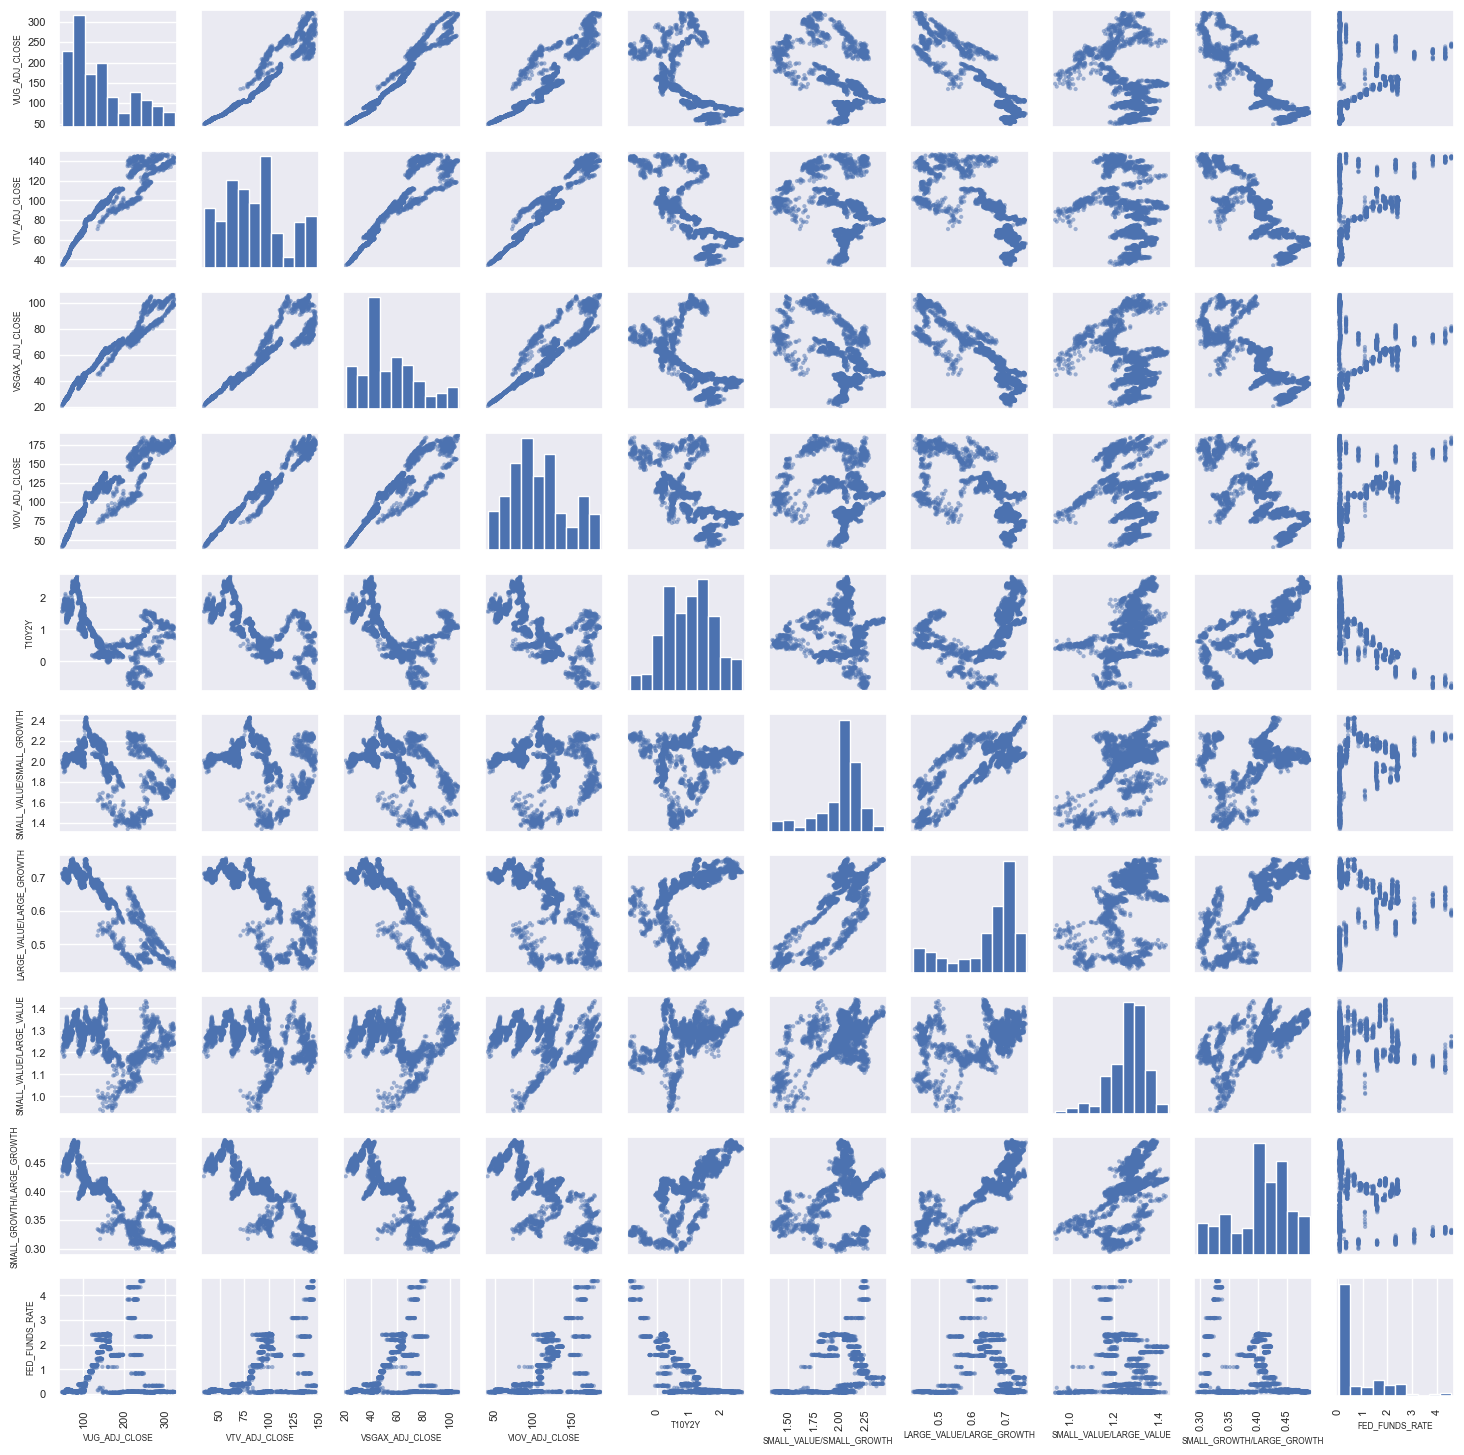

In [99]:
from pandas.plotting import scatter_matrix

sns.set(font_scale=0.5)
scatter_matrix(df, figsize=(18,18), diagonal='hist')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show() 

### Box and Whisker Plots

The boxplot of all our features is another worthwhile visualization when preparing our data.  This shows more or less the same output as the middle diagonal of the matrix scatter plot, but it is easier to interpret.  We can come to the same conclusion about the FED_FUNDS_RATE feature that we derived from the plot above; that is, the data is highly condensed to values below one, but extends to values of 4 with a few outliers.  A couple more features worthy of noting are SMALL_VALUE/SMALL_GROWTH and SMALL_VALUE/LARGE_VALUE.  These two features have a large amount of outliers.  

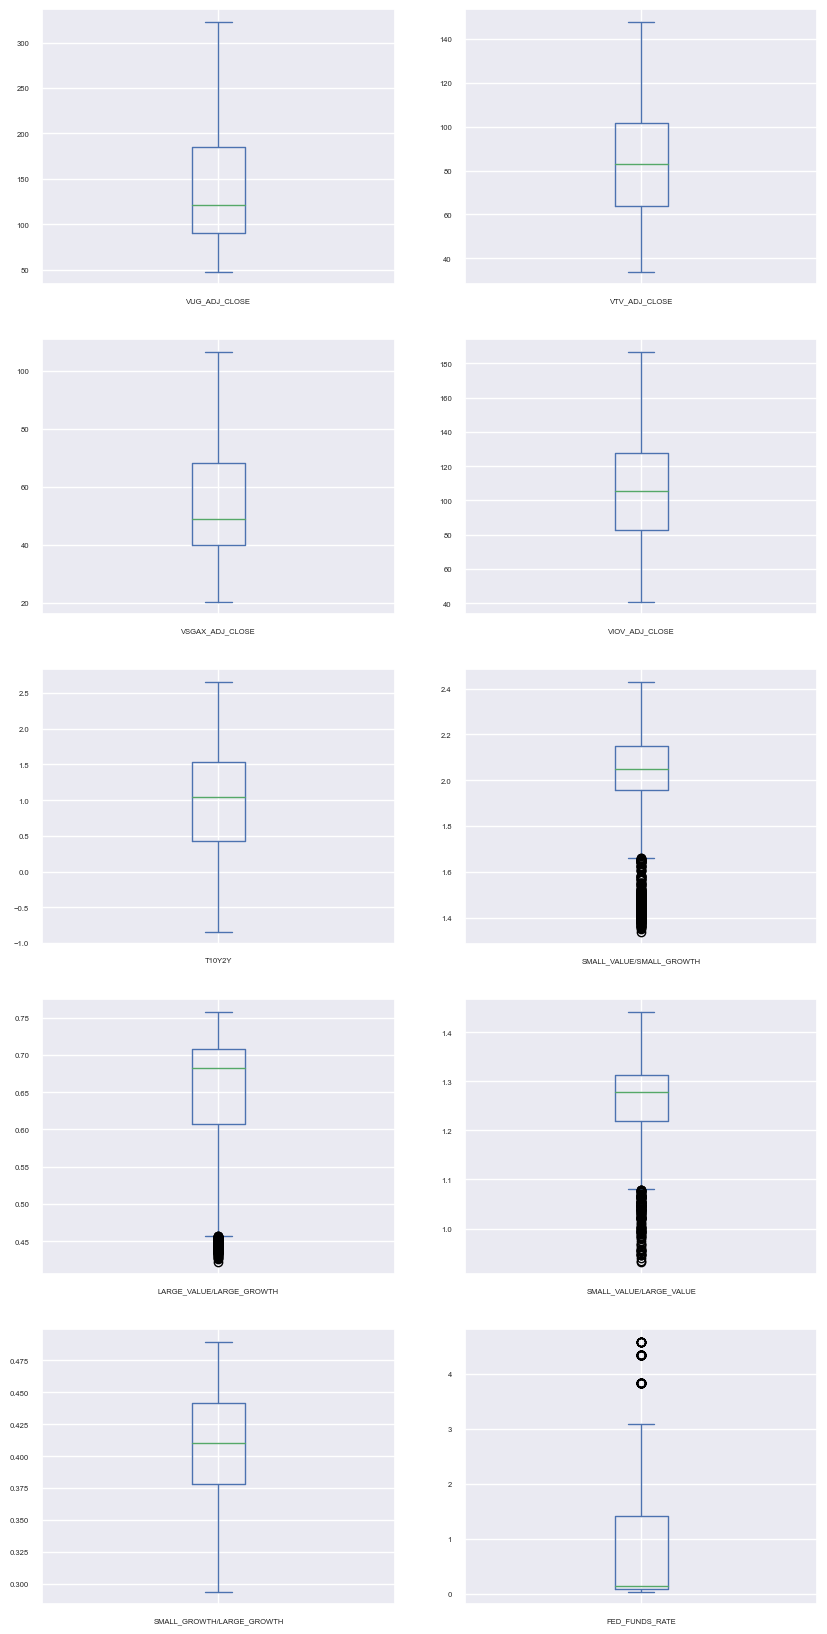

In [100]:
df.plot(kind='box', subplots=True, layout=(6,2), figsize=(10,25), sharex=False, sharey=False)
plt.show()

### LSTM Loss Function (MSE) Charts over Training Epochs 

The charts below maintain a visual record of the loss function over the training period of each index, for a total training period of 20 epochs per model. All indices except VSGAX resemble a linear decrease in the loss function for both the validation and training sets. 
The validation set was incorporated as a comparison metric to ensure the data was not overfitting to the model. Therefore, the fluctuating values for VSGAX model training indicate the model may have been overfit to the data, which was why the LSTM RNN was not included in the final trading strategy.

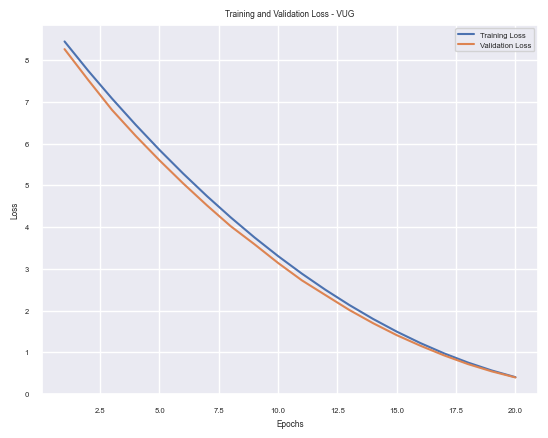

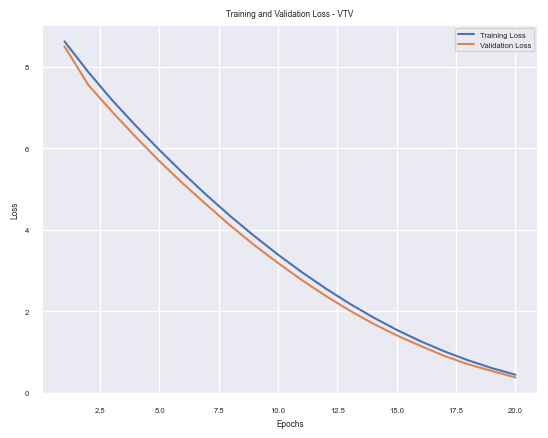

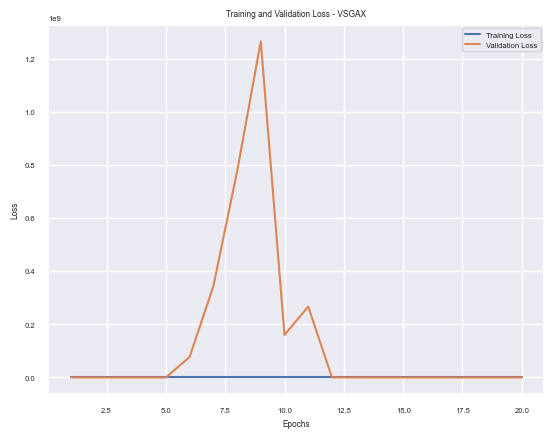

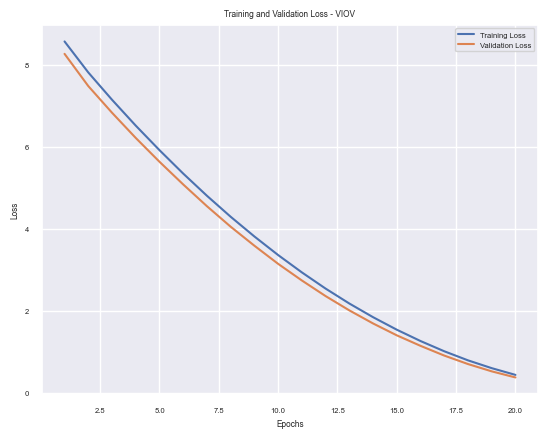

In [102]:
# VUG Loss
train_loss_vug = history_vug.history['loss']
val_loss_vug = history_vug.history['val_loss']

epochs_vug = range(1, len(train_loss_vug) + 1)
plt.plot(epochs_vug, train_loss_vug, label='Training Loss')
plt.plot(epochs_vug, val_loss_vug, label='Validation Loss')
plt.title("Training and Validation Loss - VUG")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

# VTV Loss
train_loss_vtv = history_vtv.history['loss']
val_loss_vtv = history_vtv.history['val_loss']

epochs_vtv = range(1, len(train_loss_vtv) + 1)
plt.plot(epochs_vtv, train_loss_vtv, label='Training Loss')
plt.plot(epochs_vtv, val_loss_vtv, label='Validation Loss')
plt.title("Training and Validation Loss - VTV")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

# VSGAX Loss
train_loss_vsgax = history_vsgax.history['loss']
val_loss_vsgax = history_vsgax.history['val_loss']

epochs_vsgax = range(1, len(train_loss_vsgax) + 1)
plt.plot(epochs_vsgax, train_loss_vsgax, label='Training Loss')
plt.plot(epochs_vsgax, val_loss_vsgax, label='Validation Loss')
plt.title("Training and Validation Loss - VSGAX")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

# VIOV Loss
train_loss_viov = history_viov.history['loss']
val_loss_viov = history_viov.history['val_loss']

epochs_viov = range(1, len(train_loss_viov) + 1)
plt.plot(epochs_viov, train_loss_viov, label='Training Loss')
plt.plot(epochs_viov, val_loss_viov, label='Validation Loss')
plt.title("Training and Validation Loss - VIOV")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

### Simple Moving Average and Buy-Sell Indicators

The following 4 charts plot the predicted ETF values with a 50 day small SMA and 100 day large SMA.  The buy and sell points are indicated with red dots.  In hindsight, we should have indicated a buy/sell with different colors.  Though in our code, they are indicated as a -1 for buy and +1 for sell.  The data plotted here starts at the beginning of the test data and ends at our last data point, a time span of slightly over 2 years.   The SMA’s start slightly lagged, at days 50 and 100, as the full 100 days of data is needed to calculate the simple moving average.

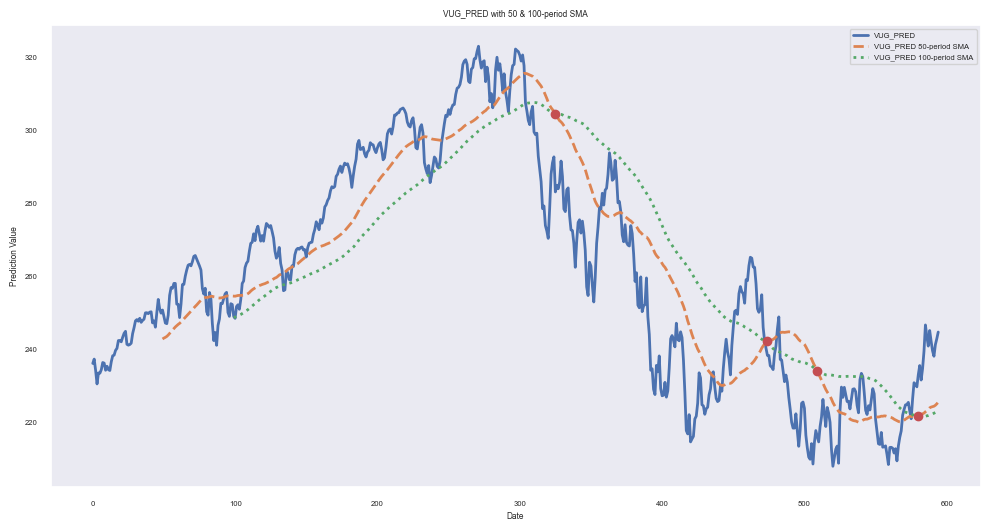

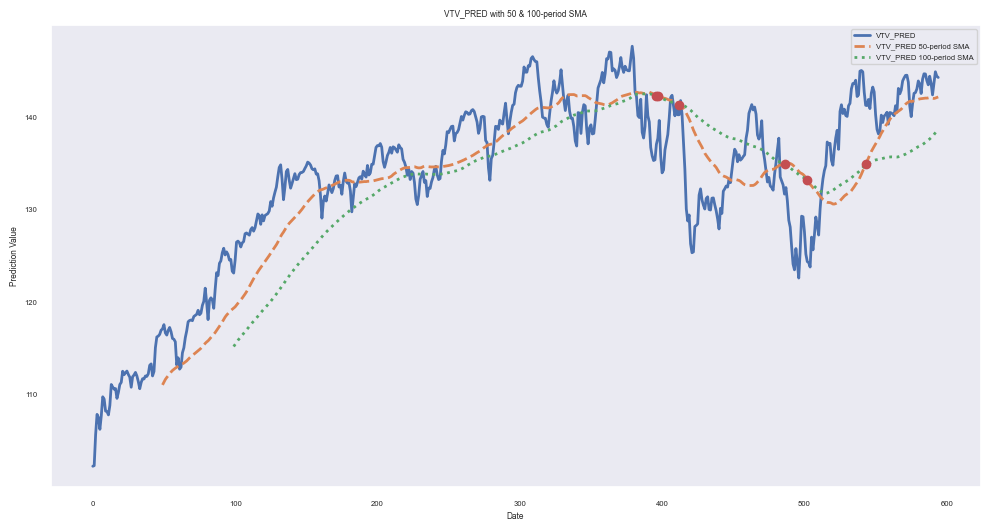

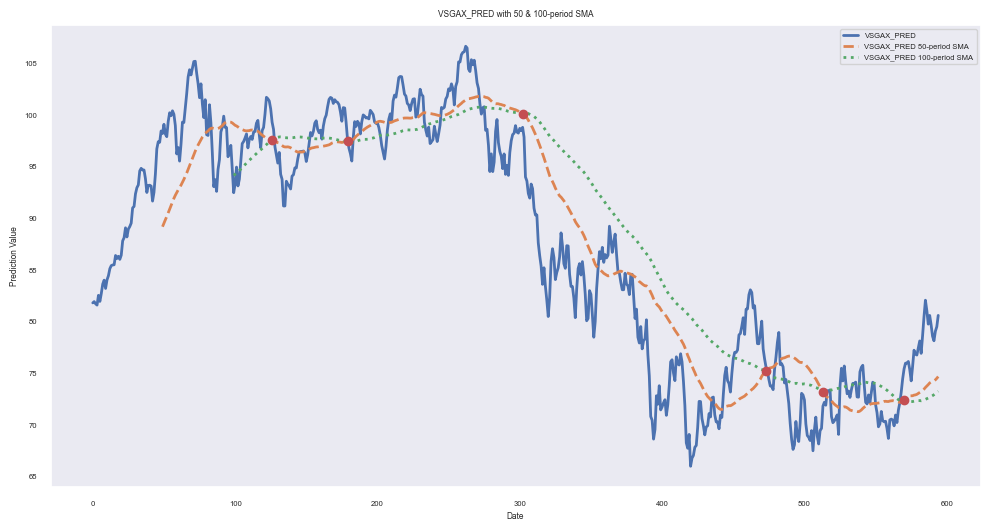

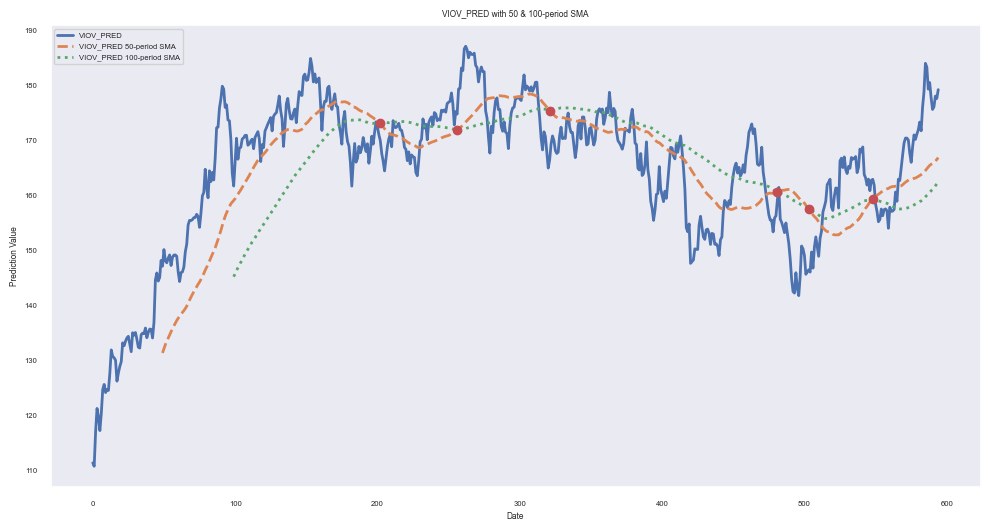

After sell signal on 126:
Weights after: [0.33333333 0.33333333 0.         0.33333333]
Portfolio Value: 518.3701460915685

After sell signal on 202:
Weights after: [0.34089505 0.34089505 0.31820991 0.        ]
Portfolio Value: 561.606461979724

After sell signal on 302:
Weights after: [0.35114171 0.35114171 0.         0.29771658]
Portfolio Value: 664.626109932914

After sell signal on 321:
Weights after: [0.3479568 0.3479568 0.3040864 0.       ]
Portfolio Value: 634.303943194764

After sell signal on 325:
Weights after: [0.         0.38259416 0.33435668 0.28304916]
Portfolio Value: 713.3649216100815

After sell signal on 396:
Weights after: [0.36544449 0.         0.3436441  0.29091141]
Portfolio Value: 683.9404276268459

After sell signal on 412:
Weights after: [0.36544449 0.         0.3436441  0.29091141]
Portfolio Value: 773.2855444522705

After sell signal on 502:
Weights after: [0.36544449 0.         0.3436441  0.29091141]
Portfolio Value: 744.7276729019975

After sell signal on 50

In [106]:
small_window = 50
large_window = 100
columns = ['VUG_PRED', 'VTV_PRED', 'VSGAX_PRED', 'VIOV_PRED']

# Calculate small and large SMA for each column
for column in columns:
    df_PRED[f'{column}_SMA_small'] = df_PRED[column].rolling(window=small_window).mean()
    df_PRED[f'{column}_SMA_large'] = df_PRED[column].rolling(window=large_window).mean()

# Find intersections between small and large SMA
def find_intersections(sma_small, sma_large):
    intersections = []
    for i in range(1, len(df_PRED)):
        if (sma_small[i - 1] < sma_large[i - 1] and sma_small[i] > sma_large[i]) or (sma_small[i - 1] > sma_large[i - 1] and sma_small[i] < sma_large[i]):
            intersections.append(i)
    return intersections

# Generate buy/sell signals
def generate_signals(df, small_sma_col, large_sma_col):
    signals = np.zeros(len(df))
    for i in range(1, len(df)):
        if df[small_sma_col].iloc[i - 1] < df[large_sma_col].iloc[i - 1] and df[small_sma_col].iloc[i] > df[large_sma_col].iloc[i]:
            signals[i] = 1  # Buy signal
        elif df[small_sma_col].iloc[i - 1] > df[large_sma_col].iloc[i - 1] and df[small_sma_col].iloc[i] < df[large_sma_col].iloc[i]:
            signals[i] = -1  # Sell signal
    return signals

# Plot each column with its small and large SMA and the intersections
for column in columns:
    small_sma = f'{column}_SMA_small'
    large_sma = f'{column}_SMA_large'
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_PRED.index, df_PRED[column], label=column, linewidth=2)
    plt.plot(df_PRED.index, df_PRED[small_sma], label=f'{column} {small_window}-period SMA', linewidth=2, linestyle='--')
    plt.plot(df_PRED.index, df_PRED[large_sma], label=f'{column} {large_window}-period SMA', linewidth=2, linestyle=':')

    intersections = find_intersections(df_PRED[small_sma], df_PRED[large_sma])
    for idx in intersections:
        plt.plot(df_PRED.index[idx], df_PRED[small_sma].iloc[idx], 'ro')

    plt.xlabel('Date')
    plt.ylabel('Prediction Value')
    plt.title(f'{column} with {small_window} & {large_window}-period SMA')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Add signals to the dataframe
    df_PRED[f'{column}_signals'] = generate_signals(df_PRED, small_sma, large_sma)
    
df_PRED.head()
starting_portfolio_value = 400
weights = np.array([.25, .25, .25, .25])

sell_transactions = []
sell_dates = []

initial_prices = df_PRED.iloc[0][columns].values
buy_prices = np.full_like(initial_prices, starting_portfolio_value / len(weights))

portfolio_values = [starting_portfolio_value]
cash = 0

for i in range(1, len(df_PRED) - 1):
    current_prices = df_PRED.iloc[i][columns].values
    sell_signals = np.array([df_PRED.iloc[i][f'{col}_signals'] == -1 for col in columns])

    portfolio_value = np.sum((current_prices / initial_prices) * buy_prices) + cash
    portfolio_values.append(portfolio_value)

    if any(sell_signals):
        sell_dates.append(df_PRED.index.tolist()[i])

        sold_etf_value = buy_prices[sell_signals] * current_prices[sell_signals] / initial_prices[sell_signals]
        bought_etf_cost = buy_prices[sell_signals]
        sold_etf_profit = sold_etf_value - bought_etf_cost

        cash += sold_etf_profit.sum()

        new_weights = np.zeros_like(weights)
        new_weights[~sell_signals] = weights[~sell_signals] * (1 + sold_etf_profit / bought_etf_cost)
        new_weights[sell_signals] = 0
        new_weights /= np.sum(new_weights)

        buy_prices[~sell_signals] += cash * new_weights[~sell_signals]
        weights = buy_prices / np.sum(buy_prices)

        cash = 0
        
        sell_transactions.append(portfolio_values[-1])
        
        print(f"After sell signal on {i}:")
        print(f"Weights after: {new_weights}")
        print(f"Portfolio Value: {portfolio_value}\n")
    

### Trading Strategy Implementation

This chart plots the value of our portfolio with our implemented trading strategy over the course of predicted data.  The orange dots indicate that one of the 4 ETFs was sold, with the proceeds being redistributed into the other 3 ETFs as buy orders.  The jumps in value after some of the sales indicate that the held portfolio saw a net gain.  We started with an initial investment of $400 and ended with a portfolio value of a little over $900.  The chart plots our holdings on a daily basis, reflecting the predicted price as it increases/decreases.  Another addition to make this graph more descriptive could have been a chart that tracks the position if we simply bought into all 4 ETFs and held for the duration of the testing data.  This would provide a good benchmark against our returns.  One last consideration would be to find another industry wide benchmark, such as the S&P 500 to plot against our returns.  This would provide a general idea of the state of the market over the testing data.

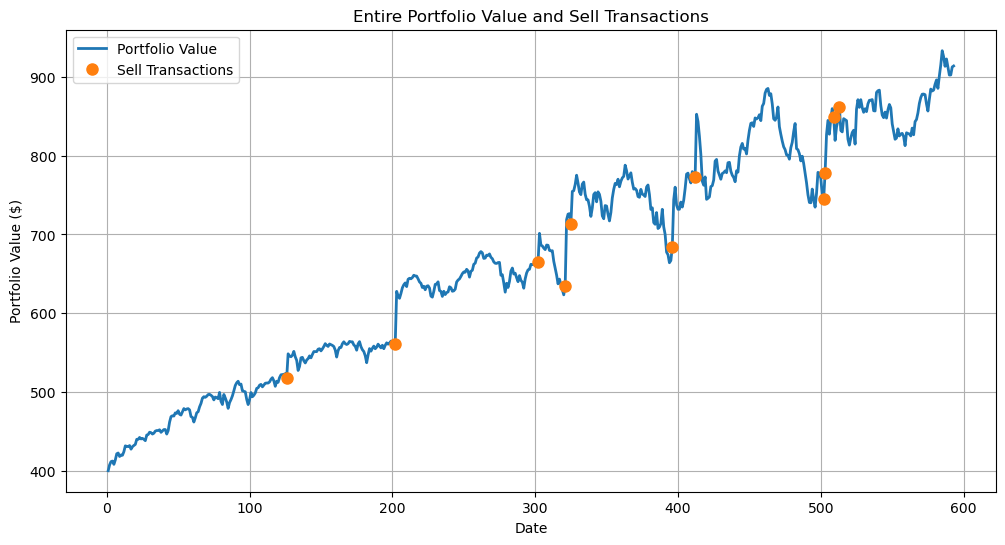

In [96]:
# Plot portfolio values and sell transactions
plt.figure(figsize=(12, 6))
plt.plot(df_PRED.index[1: -1], portfolio_values[1:], marker='', linestyle='-', linewidth=2, label='Portfolio Value')
plt.plot(sell_dates, sell_transactions, marker='o', linestyle='', markersize=8, label='Sell Transactions')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Entire Portfolio Value and Sell Transactions')
plt.grid()
plt.legend()
plt.show()

## 6.0 References :
(Note: References not including all that was noted in Mid-Semester)

Kumar, R., Kumar, P., & Kumar, Y. (2022). Multi-step time series analysis and forecasting strategy using ARIMA and evolutionary algorithms. International Journal of Information Technology, 14, 359-373. https://doi.org/10.1007/s41870-021-00729-1 <br>

Day, M.-Y., & Lin, J.-T. (2019). Artificial intelligence for ETF market prediction and portfolio optimization. In Proceedings of the 2019 IEEE/ACM International Conference on Advances in Social Networks Analysis and Mining (pp. 1026-1033). https://doi.org/10.1145/3341161.3344822 <br>

Meyler, A., Kenny, G., & Quinn, T. (1998). Forecasting Irish Inflation Using ARIMA Models. Central Bank and Financial Services Authority of Ireland. MPRA Paper Series No. 11359, Vol. 1998, No. 3/RT/98 (December 1998): pp. 1-48. https://mpra.ub.uni-muenchen.de/11359/ <br>

Rundo F, Trenta F, di Stallo AL, Battiato S. (2019). Machine Learning for Quantitative Finance Applications: A Survey. Applied Science 9, no. 24:5574. https://doi.org/10.3390/app9245574 <br>

Zhang, Z., & Wu, J. (2020). Predicting Stock Prices with Long Short-Term Memory Based Time Series Forecasting. In Proceedings of the 3rd International Conference on Computer Science and Application Engineering (pp. 359-364). Springer.<br> 

Verma, S., Sahu, S. P., & Sahu, T. P. (2020). Ensemble Approach for Stock Market Forecasting Using ARIMA and LSTM Model. Journal of Physics: Conference Series, 1665(1), 012111. https://link.springer.com/chapter/10.1007/978-981-16-7330-6_6<br>

Liu, J., Zhang, Y., Guo, L., & Zhang, X. (2020). A Deep Learning Model Based on LSTM and ReLU for Multivariate Time Series Prediction. IEEE Access, 8, 67299-67308.<br>
